In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import OdeSolver, solve_ivp

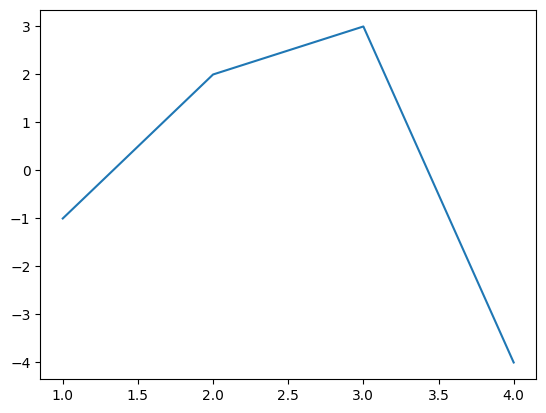

In [7]:
fig, ax = plt.subplots() 
ax.plot([1,2,3,4],[-1,2,3,-4])
plt.show()

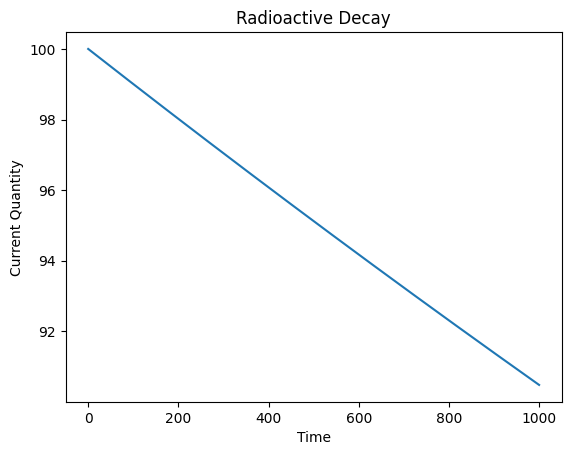

In [8]:
fig, ax = plt.subplots() 
def radioActiveDecay(CurrentQuantity, DecayRate, Time, StepSize):
    """
    delta(CurrentQuantity) = -DecayRate*CurrentQuantity*StepSize
    """
    times = []  # to store time points
    quantities = []  # to store quantities
    
    for i in range(0, int(Time / StepSize)):  # step through time
        time_point = i * StepSize
        times.append(time_point)
        quantities.append(CurrentQuantity)
        
        CurrentQuantity -= DecayRate * CurrentQuantity * StepSize  # update quantity
    
    # Plot the result
    ax.plot(times, quantities, label='Radioactive Decay')
    ax.set_xlabel('Time')
    ax.set_ylabel('Current Quantity')
    ax.set_title('Radioactive Decay')

radioActiveDecay(100,0.0001,1000,0.001)
plt.show()

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-03 ...  1.000e+04  1.000e+04]
        y: [[ 1.000e+09  1.000e+09 ...  4.563e+04  4.563e+04]]
      sol: None
 t_events: None
 y_events: None
     nfev: 92
     njev: 0
      nlu: 0


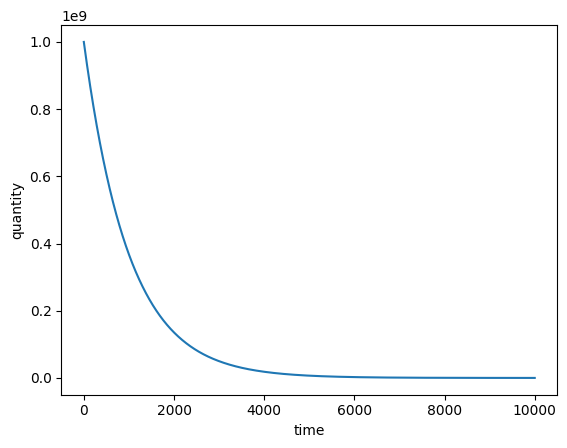

In [15]:
#using ode solvers from scipy integrate
# Parameters
initial_quantity = 1_000_000_000  # Initial quantity of substance
decay_rate = 0.001  # Decay constant
time_span = (0, 10000)  # Time range from 0 to 100000
step_size = 0.001  # Step size for evaluation points

#define the differential equation
def decay_ode(t,y, decay_rate):
    return -decay_rate*y

solution = solve_ivp(decay_ode,time_span, [initial_quantity],args=(decay_rate,), t_eval=np.arange(time_span[0],time_span[1], step_size))
print(solution)
plt.plot(solution.t, solution.y[0], label='Radioactive Decay (using solve_ivp)')
plt.xlabel('time')
plt.ylabel('quantity')
plt.show()